In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("E:/ml/datasets_137197_325031_train_u6lujuX_CVtuZ9i.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())


In [5]:
data.dropna(inplace=True)


In [6]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
data['Loan_Status'].replace('N',0 ,inplace=True)
data['Loan_Status'].replace('Y',1 ,inplace=True)


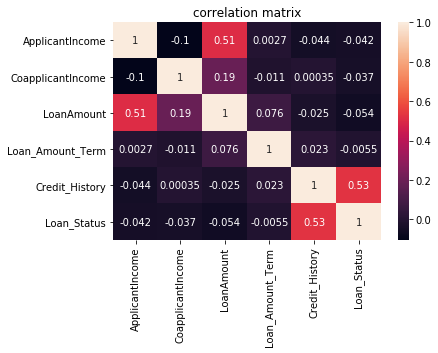

In [8]:
plt.title('correlation matrix')
sns.heatmap(data.corr(),annot=True)

In [9]:
data=data.drop(labels=['ApplicantIncome'],axis=1)
data=data.drop(labels=['CoapplicantIncome'],axis=1)
data=data.drop(labels=['Loan_Amount_Term'],axis=1)
data=data.drop(labels=['LoanAmount'],axis=1)


In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Property_Area']=le.fit_transform(data['Property_Area'])
data['Dependents']=le.fit_transform(data['Dependents'])

In [12]:
data['Gender']=le.fit_transform(data['Gender'])
data['Education']=le.fit_transform(data['Education'])
data['Self_Employed']=le.fit_transform(data['Self_Employed'])
data['Married']=le.fit_transform(data['Married'])

In [13]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,1.0,2,1
1,LP001003,1,1,1,0,0,1.0,0,0
2,LP001005,1,1,0,0,1,1.0,2,1
3,LP001006,1,1,0,1,0,1.0,2,1
4,LP001008,1,0,0,0,0,1.0,2,1


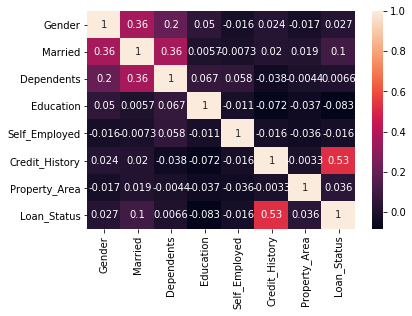

In [14]:
sns.heatmap(data.corr(),annot=True)

In [15]:
data=data.drop('Self_Employed',1)
data=data.drop('Dependents',1)
data=data.drop('Loan_ID',1)
data=data.drop('Education',1)

In [16]:
data.head()

,Gender,Married,Credit_History,Property_Area,Loan_Status
0,1,0,1.0,2,1
1,1,1,1.0,0,0
2,1,1,1.0,2,1
3,1,1,1.0,2,1
4,1,0,1.0,2,1


In [17]:
x=data.iloc[:, :-1].values
y=data.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [22]:

y_pred=classifier.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
print (cm)

[[14  2]
 [17 78]]


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8288288288288288

In [25]:
import collections

In [26]:
a=np.array(y_test)
collections.Counter(a)

Counter({1: 80, 0: 31})

In [27]:
b=np.array(y_pred)
collections.Counter(b)

Counter({1: 95, 0: 16})

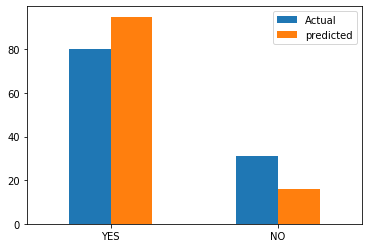

In [28]:
Actual=[80,31]
predicted=[95,16]
index=['YES','NO']
df = pd.DataFrame({'Actual': Actual,
                   'predicted':predicted }, index=index)
ax = df.plot.bar(rot=0)
